In [7]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [8]:
X = np.loadtxt('x.txt')
X = X[:, 2:]
y = np.loadtxt('y.txt')

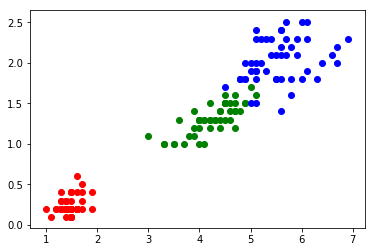

In [9]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='g')
plt.scatter(X[y==2, 0], X[y==2, 1], color='b')
plt.show()

In [11]:
def gini(y):
    counter = Counter(y)
    result = 0
    for v in counter.values():
        result += (v/ len(y))**2
    return 1-result
def cut(X, y, v, d):
    ind_left = (X[:, d] <= v)
    ind_right = (X[:, d] > v)
    return X[ind_left], X[ind_right], y[ind_left], y[ind_right]

def try_split(X, y):
    best_g, best_d, best_v = 1, -1, -1
    for d in range(X.shape[1]):
        sorted_ind = np.argsort(X[:, d])
        for i in range(len(X) - 1):
            if X[sorted_ind[i], d] == X[sorted_ind[i+1], d]:
                continue
            v = (X[sorted_ind[i], d] + X[sorted_ind[i+1], d])/2
            X_left, X_right, y_left, y_right = cut(X, y, v, d)
            g_all = gini(y_left) + gini(y_right)
            if g_all < best_g:
                best_g, best_d, best_v =g_all, d, v
    return best_d, best_v, best_g

In [12]:
try_split(X, y)

(0, 2.45, 0.5)

In [23]:
class Node():
    def __init__(self, d=None, v=None, g=None, l=None):
        self.dim, self.value, self.gini, self.label = d, v, g, l
        self.children_left, self.children_right = None, None
    def __repr__(self):
        return 'Node(d={}, v={}, g={}, l={})'.format(self.dim, self.value, self.gini, self.label)

In [ ]:
class Node:
    def __init__(self,d=None,v=None,g=None,l=None):
        self.d, self.v, self.g, self.l = d, v, g, l
        self.children_left, self.children_right = None, None
    def __repr__(self):
        return 
    __repr__ == __str__

In [27]:
def create_tree(X, y):
    d, v, g = try_split(X, y)
    if d == -1 or g == 0:
        return None
    node = Node(d, v, g)
    
    X_left, X_right, y_left, y_right = cut(X, y, v, d)
    
    node.children_left = create_tree(X_left, y_left)
    if node.children_left is None:
        # label
        label = Counter(y_left).most_common(1)[0][0]
        node.children_left = Node(l=label)
        
    node.children_right = create_tree(X_right, y_right)
    if node.children_right is None:
        # label
        label = Counter(y_right).most_common(1)[0][0]
        node.children_right = Node(l=label)
        
    return node

In [ ]:
def creat_tree(X ,y):
    d, v, g = try_split(X, y)
    if d==-1 or g==0:
        return None
    node = Node(d,v,g)
    X_left, X_right, y_left, y_right = cut(X, y, v, d)
    node.children_left = creat_tree(X_left, y_left)
    if creat_tree(X_left, y_left) is None:
        node.children_left = Node(l=Counter(y_left).most_common(1)[0][0])

In [28]:
tree = create_tree(X, y)
tree

Node(d=0, v=2.45, g=0.5, l=None)

In [29]:
tree.children_left

Node(d=None, v=None, g=None, l=0.0)

In [30]:
tree.children_right

Node(d=1, v=1.75, g=0.21057149006459386, l=None)

In [33]:
tree.children_right.children_left

Node(d=0, v=5.35, g=0.10872781065088755, l=None)

In [34]:
tree.children_right.children_left.children_left

Node(d=0, v=3.15, g=0.11072664359861584, l=None)

In [46]:
def show_tree(node):
    if node is None:
        return ''
    
    result = '{} [label="{}"]'.format(id(node), node)
    
    if node.children_left is not None:
        result += '{} [label="{}"]\n'.format(id(node.children_left), node.children_left)
        result += '"{}" -> "{}"\n'.format(id(node), id(node.children_left))
        result += show_tree(node.children_left)
        
    if node.children_right is not None:
        result += '{} [label="{}"]\n'.format(id(node.children_right), node.children_right)
        result += '"{}" -> "{}"\n'.format(id(node), id(node.children_right))
        result += show_tree(node.children_right)
        
    return result
        

In [47]:
# print('digraph{\n')
# print(show_tree(tree))
# print('}\n')

In [48]:
with open('temp.dot', 'w') as f:
    f.write('digraph{\n'+ show_tree(tree) + '}\n')

## 使用决策树进行分类

In [49]:
def predict(x, node):
    if node.label is not None:
        return node.label
    
    if x[node.dim] <= node.value:
        #left
        return predict(x, node.children_left)
    else:
        #right
        return predict(x, node.children_right)

In [50]:
predict(X[0], tree)

0.0

In [51]:
predict(X[100], tree)

2.0

In [52]:
predict(X[23], tree)

0.0